In [1]:
# measure of fractal

# measure of low vs high frequency

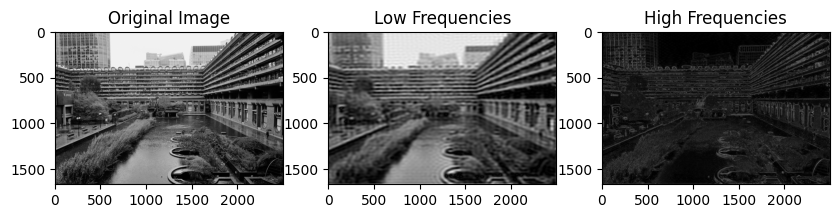

In [3]:
from fft import fft

fft("data/images/biophilic.jpg")

In [2]:
import cv2
from FractalDimension import fractal_dimension, crop_to_square, convert_to_greyscale

crop_to_square("data/images/biophilic.jpg", "data/images/biophilic_2.jpg")
convert_to_greyscale("data/images/biophilic_2.jpg", "data/images/p_biophilic.jpg")

img = cv2.imread("data/images/p_biophilic.jpg", 0)

fd = fractal_dimension(img)
print(f"Fractal dimension of the image: {fd}")

KeyboardInterrupt: 

In [ ]:
import numpy as np
import tdqm


def boxcount(im, bins=10):
    r"""
    Calculates the fractal dimension of an image using the tiled box counting
    method [1]_

    Parameters
    ----------
    im : ndarray
        A boolean image of the porous material with `True` values indicating the
        phase of interest.
    bins : int or array_like, optional
        The number of box sizes to use. The default is 10 sizes logarithmically
        spaced between 1 and ``min(im.shape)``. If an array is provided, this is
        used directly.

    Returns
    -------
    results : dataclass-like
        An object possessing the following attributes:

        ========== =================================================================
        Attribute  Description
        ========== =================================================================
        size       An array containing the specific box sizes used
        count      An array containing the number of boxes of each size that
                   contain both solid and void
        slope      The gradient of ``count``. This has the same number of elements
                   as ``count``.
        ========== =================================================================

    References
    ----------
    .. [1] See Boxcounting on `Wikipedia
       <https://en.wikipedia.org/wiki/Box_counting>`_

    Examples
    --------
    `Click here
    <https://porespy.org/examples/metrics/reference/box_counting.html>`_
    to view online example.

    """
    im = np.array(im, dtype=bool)

    if len(im.shape) != 2 and len(im.shape) != 3:
        raise Exception("Image must be 2-dimensional or 3-dimensional")

    if isinstance(bins, int):
        Ds = np.unique(np.logspace(1, np.log10(min(im.shape)), bins).astype(int))
    else:
        Ds = np.array(bins).astype(int)

    N = []
    for d in tqdm(Ds, **settings.tqdm):
        result = 0
        for i in range(0, im.shape[0], d):
            for j in range(0, im.shape[1], d):
                if len(im.shape) == 2:
                    temp = im[i : i + d, j : j + d]
                    result += np.any(temp)
                    result -= np.all(temp)
                else:
                    for k in range(0, im.shape[2], d):
                        temp = im[i : i + d, j : j + d, k : k + d]
                        result += np.any(temp)
                        result -= np.all(temp)
        N.append(result)
    slope = -1 * np.gradient(np.log(np.array(N)), np.log(Ds))
    data = Results()
    data.size = Ds
    data.count = N
    data.slope = slope
    return data